#  Import Libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import time
import re
from collections import Counter


# Send Request to  the Website

In [2]:
url = "https://internshala.com/internships/data-analytics-internship"
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')


# Extract Job Listings

In [3]:
jobs = soup.find_all('div', class_='individual_internship')


# Extract Data for Each Job

In [5]:
job_data = []

for job in jobs:
    # Job Title
    title_tag = job.find('div', class_='heading_4_5 profile')
    title = title_tag.text.strip() if title_tag else 'Not Available'
    
    # Company Name
    company_tag = job.find('div', class_='heading_6 company_name')
    company = company_tag.text.strip() if company_tag else 'Not Available'
    
    # Location
    location_tag = job.find('a', class_='location_link')
    location = location_tag.text.strip() if location_tag else 'Not Available'
    
    # Salary / Stipend
    salary_tag = job.find('span', class_='stipend')
    salary = salary_tag.text.strip() if salary_tag else 'Not Mentioned'
    
    # Skills
    skills_tag = job.find('div', class_='item_body')
    skills = skills_tag.text.strip() if skills_tag else 'Not Mentioned'
    
    job_data.append([title, company, location, salary, skills])


# Convert to DataFrame

In [6]:
df = pd.DataFrame(job_data, columns=['Title', 'Company', 'Location', 'Salary', 'Skills'])
print(df.head())


           Title                                            Company  \
0  Not Available  Web3Task                        \nActively hiring   
1  Not Available  Mahindra Logistics Limited                    ...   
2  Not Available  Sportskeeda                        \nActively ...   
3  Not Available  Kores (India) Limited                        \...   
4  Not Available  Corteva Agriscience                        \nA...   

        Location                   Salary         Skills  
0  Not Available  ₹ 8,000 - 10,000 /month  Not Mentioned  
1  Not Available          ₹ 20,000 /month  Not Mentioned  
2  Not Available  ₹ 8,000 - 10,000 /month  Not Mentioned  
3  Not Available           ₹ 5,000 /month  Not Mentioned  
4  Not Available          ₹ 35,000 /month  Not Mentioned  


# Clean and Preprocess Data

In [7]:
# Normalize skills using regex
all_skills = []
for skill in df['Skills']:
    skill_list = re.findall(r'\b\w+\b', skill.lower())
    all_skills.extend(skill_list)

skill_counts = Counter(all_skills)


#  Basic Analysis

# Total Jobs Scraped

In [8]:
print(f"Total jobs scraped: {len(df)}")


Total jobs scraped: 43


# Top 5 Locations

In [11]:
top_locations = df['Location'].value_counts().head(5)
print(top_locations)


Location
Not Available    43
Name: count, dtype: int64


#  Most In-Demand Skills

In [12]:
print(skill_counts.most_common(10))


[('not', 43), ('mentioned', 43)]


# Visualizations

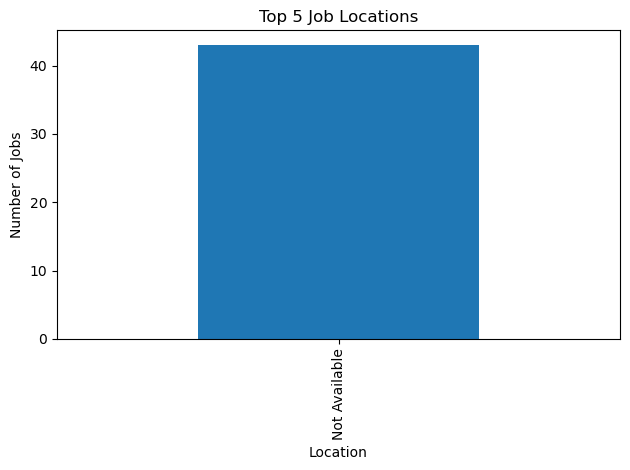

In [13]:
top_locations.plot(kind='bar', title='Top 5 Job Locations')
plt.xlabel('Location')
plt.ylabel('Number of Jobs')
plt.tight_layout()
plt.show()


# Skills (Optional Pie Chart)

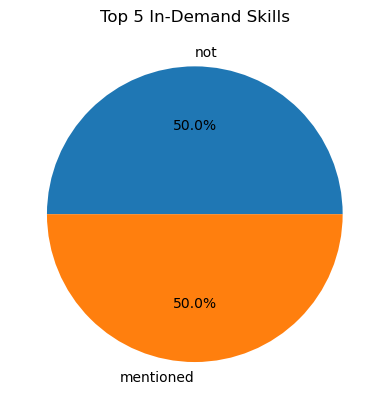

In [14]:
top_skills = dict(skill_counts.most_common(5))
plt.pie(top_skills.values(), labels=top_skills.keys(), autopct='%1.1f%%')
plt.title('Top 5 In-Demand Skills')
plt.show()
